# Hall-Petch equation exercise

A copper-zinc alloy has the following properties:

- For a grain size of 0.015 mm it has a yield strength of 170 MPa.
- For a grain size of 0.0035 mm it has a yield strength of 151 MPa.

Make a graph of yield strength vs grain size so that it's easy to interpolate or extrapolate for a datum.

In [0]:
size1 = 0.015 # mm
yield_strength1 = 170 # MPa
size2 = 0.0035 # mm
yield_strength2 = 151 # MPa

The Hall-Petch equation reads

$$ \sigma_y = \sigma_0 + Kd^{-1/2}  $$

Where

- $\sigma_y$ is the yield strength.
- $\sigma_0$ and $K$ are constants for the metal.
- $d$ is the grain size.

We'll start by converting the given sizes from mm to mm$^{-1/2}$

In [2]:
import numpy as np

inv_sqrt_d1 = np.power(size1, -0.5)
inv_sqrt_d2 = np.power(size2, -0.5)

print('d1^(-1/2):', inv_sqrt_d1)
print('d2^(-1/2):', inv_sqrt_d2)

d1^(-1/2): 8.16496580927726
d2^(-1/2): 16.903085094570333


Now we'll perform linear regression with these values

In [3]:
import scipy.stats

x = np.array([inv_sqrt_d1, inv_sqrt_d2])
y = np.array([yield_strength1, yield_strength2])
K, sigma_0, _, _, _ = scipy.stats.linregress(x, y)

print('sigma_0:', sigma_0)
print('K:', K)

sigma_0: 187.7537460077217
K: -2.174380937094606


Let's construct the linear graph

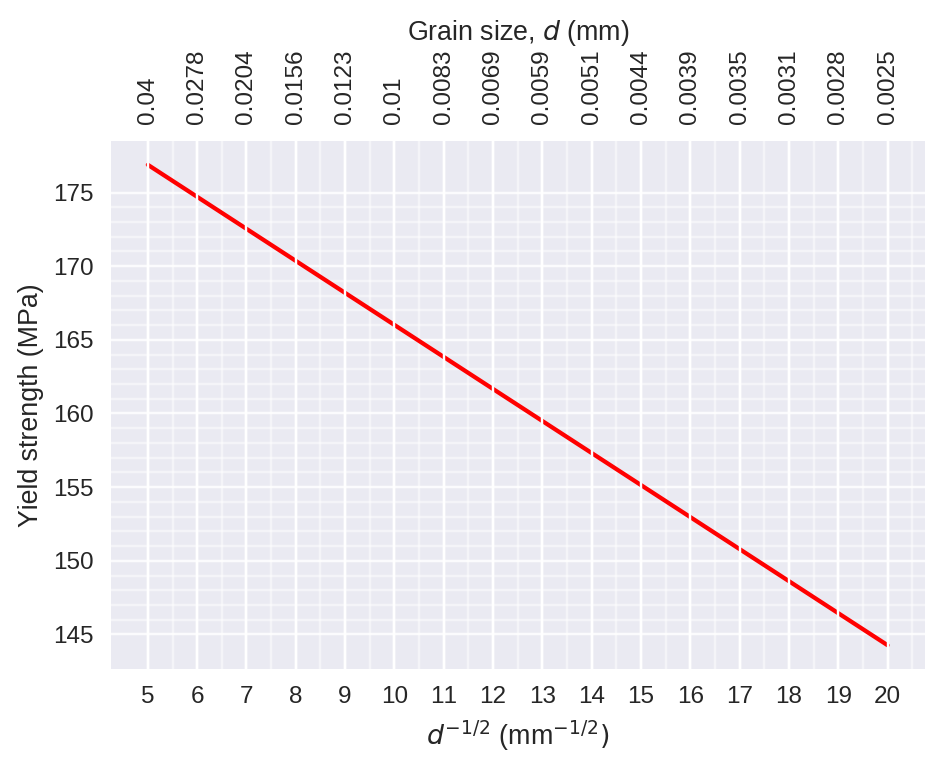

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(5, 20)
y = sigma_0 + K * x

fig = plt.figure(dpi=175)
ax = fig.add_subplot(1, 1, 1)
top_ticks_ax = ax.twiny()

# Major ticks every 1, minor ticks every 5
x_major_ticks = np.arange(5, 21, 1)
x_minor_ticks = np.arange(5, 21, 0.5)
ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks, minor=True)

# Major ticks every 1, minor ticks every 5
y_major_ticks = np.arange(145, 176, 5)
y_minor_ticks = np.arange(145, 176, 1)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.7)

ax.plot(x, y, 'r-')
ax.set_xlabel('$d^{-1/2}$ (mm$^{-1/2})$')
ax.set_ylabel('Yield strength (MPa)');

top_ticks = x_major_ticks.astype(float)
top_ticks_labels = np.round(np.power(top_ticks, -2), decimals=4)

top_ticks_ax.set_xlim(ax.get_xlim())
top_ticks_ax.set_xticks(top_ticks)
top_ticks_ax.set_xticklabels(top_ticks_labels, rotation='vertical')
top_ticks_ax.set_xlabel('Grain size, $d$ (mm)');